# Logistic Regression Model on Forest Fires Dataset to Predict Fire Probability

# Feature Engineering

Select Classes as the dependent feature and the rest as the independent features. 

Class: 0 = not fire, 1 = fire 

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Change path as needed
df=pd.read_csv('~/Desktop/Data Science/GitHub/Machine-Learning-Projects-End-to-End/Algerian-Forest-Fire-Predictor/dataset/Algerian_forest_fires_cleaned_dataset.csv')
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [5]:
# Import the train and test indices 
# Change path as needed
train_idx = pd.read_csv('~/Desktop/Data Science/GitHub/Machine-Learning-Projects-End-to-End/Algerian-Forest-Fire-Predictor/dataset/train_idx.csv')['train_idx'].values
test_idx = pd.read_csv('~/Desktop/Data Science/GitHub/Machine-Learning-Projects-End-to-End/Algerian-Forest-Fire-Predictor/dataset/test_idx.csv')['test_idx'].values

In [6]:
# Separate into X and y features
X = df.drop(columns=['Classes'])
y = df['Classes']

In [7]:
# Split the data into training and testing splits
X_train = X.iloc[train_idx]
X_test = X.iloc[test_idx]
y_train = y.iloc[train_idx]
y_test = y.iloc[test_idx]

# Check the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (182, 11)
X_test shape: (61, 11)
y_train shape: (182,)
y_test shape: (61,)


## Remove Highly Correlated Features except FWI

In [11]:
# Define a function to detect correlated variables based on a threshold (threshold determined based on domain expertise)
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                # Exclude FWI from being dropped
                if colname != 'FWI':
                    col_corr.add(colname)
    return col_corr

In [12]:
# Determine correlated features - we are using 0.85 as a threshold but that can be changed based on domain expertise
corr_features=correlation(X_train,0.85)
corr_features

{'BUI', 'DC'}

In [13]:
# Drop features when correlation is more than 0.85 
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape, X_test.shape

/var/folders/3v/wc4cv1c5015_bssv4wn_bwkc0000gn/T/ipykernel_7212/1700686929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(corr_features,axis=1,inplace=True)
/var/folders/3v/wc4cv1c5015_bssv4wn_bwkc0000gn/T/ipykernel_7212/1700686929.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(corr_features,axis=1,inplace=True)


((182, 9), (61, 9))

## Feature Scaling Or Standardization

In [14]:
from sklearn.preprocessing import StandardScaler

# Fit the scaler using training data and transform both the training and test data using the scaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

### Box plots to understand effect of standard scaler

Text(0.5, 1.0, 'X_Train After Scaling')

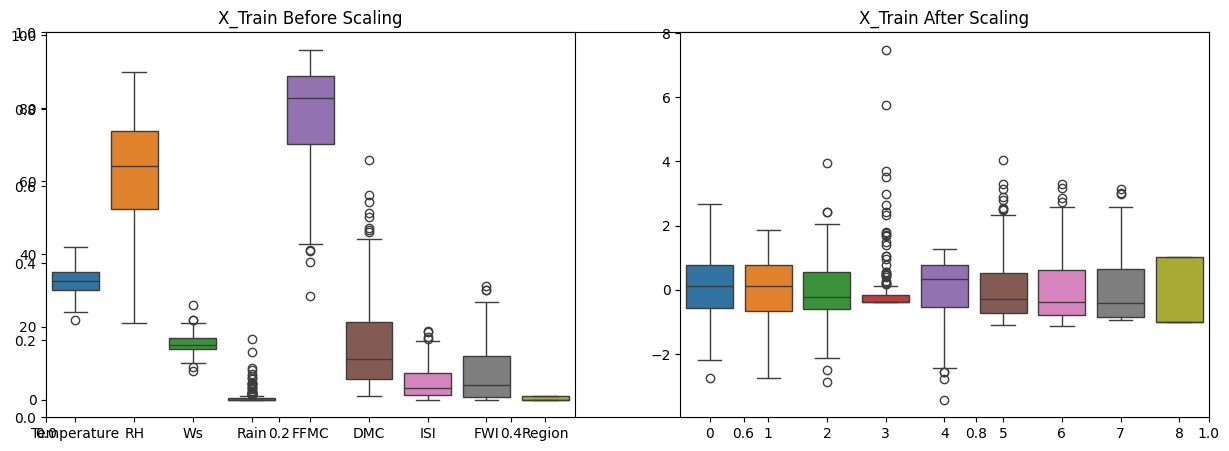

In [15]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_Train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_Train After Scaling')

# Modeling